In [1]:
import nltk
import random
import time

In [2]:
g_t0 = time.time()

In [3]:
treebank_sents = list(nltk.corpus.treebank.tagged_sents())
print (len(treebank_sents))

random.shuffle(treebank_sents)

test_train_split = 3200
train_sents = treebank_sents[:test_train_split]
test_sents = treebank_sents[test_train_split:]

3914


In [4]:
def num_tokens(tagged_sents):
    return sum([len(s) for s in tagged_sents])

In [5]:
class UnigramTagger(object):
    def __init__(self, train_size):
        self.train_size = train_size
    
    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        self._tagger = nltk.tag.UnigramTagger(train_sents)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [6]:
class BigramTagger(object): 
    def __init__(self, train_size):
        self.train_size = train_size

    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        self._tagger = nltk.tag.BigramTagger(train_sents)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [7]:
class BrillTagger(object):
    def __init__(self, train_size):
        self.train_size = train_size

    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        unigram_tagger = nltk.tag.UnigramTagger(train_sents)
        brill_trainer = nltk.tag.brill_trainer.BrillTaggerTrainer(unigram_tagger, nltk.tag.brill.brill24())
        self._tagger = brill_trainer.train(train_sents)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [8]:
class PerceptronTagger(object):  
    def __init__(self, train_size):
        self.train_size = train_size

    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        self._tagger = nltk.tag.perceptron.PerceptronTagger(load=False)
        self._tagger.train(train_sents)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [9]:
class TnTTagger(object):   
    def __init__(self, train_size):
        self.train_size = train_size
    
    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        self._tagger = nltk.tag.tnt.TnT()
        self._tagger.train(train_sents)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [10]:
taggers = []
for i in range(1, 6):
    train_size = i * 200
    taggers.append(UnigramTagger(train_size))
    taggers.append(BigramTagger(train_size))
    taggers.append(BrillTagger(train_size))
    taggers.append(PerceptronTagger(train_size))
    taggers.append(TnTTagger(train_size))

In [11]:
train_times = []
for t in taggers:
#     print (type(t).__name__)
    t0 = time.time()
    t.train(train_sents)
    t1 = time.time()
    train_times.append(t1 - t0)

In [12]:
accuracies = []
test_times = []
for t in taggers:
#     print (type(t).__name__)
    t0 = time.time()
    accuracy = t.test(test_sents[:500])
    t1 = time.time()
    accuracies.append(accuracy)
    test_times.append(t1 - t0)

In [13]:
g_t1 = time.time()
print (g_t1 - g_t0)

376.9243128299713


In [14]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

In [15]:
tagger_types = [type(t).__name__ for t in taggers]
tokens_sizes = [t.tokens_size for t in taggers]

test_runs = [('tagger_type', tagger_types),
             ('tokens_size', tokens_sizes),
             ('accuracy', accuracies),
             ('train_time', train_times),
             ('test_time', test_times)]

df = pd.DataFrame.from_items(test_runs)
grouped = df.groupby(['tagger_type'])

In [16]:
def my_plot(grouped, field):
    fig, ax = plt.subplots(figsize=(8,6))
    for key, grp in grouped:
        grp.plot(x='tokens_size', y=field, ax=ax, label=key)
    plt.legend(loc='best')    
    plt.show()

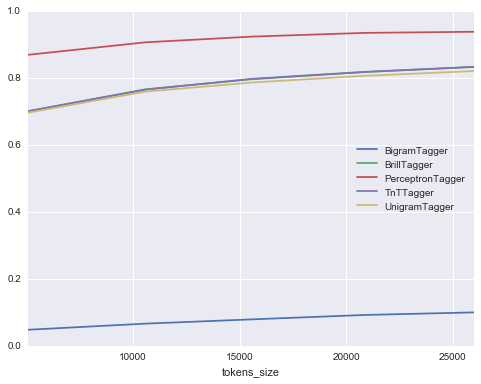

In [17]:
my_plot(grouped, 'accuracy')

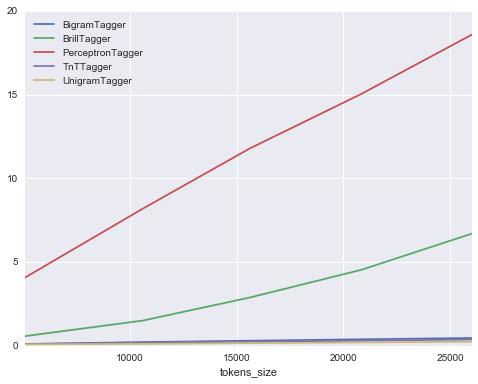

In [18]:
my_plot(grouped, 'train_time')

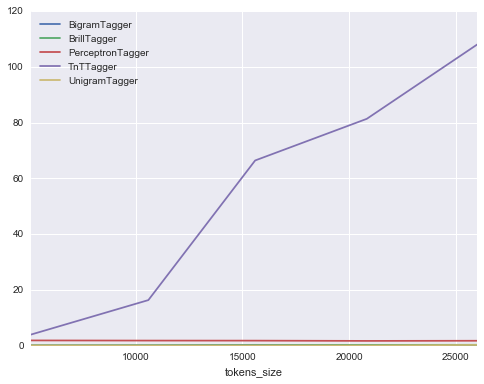

In [19]:
my_plot(grouped, 'test_time')

In [20]:
grouped.describe()

accuracy   test_time   tokens_size  train_time
tagger_type                                                           
BigramTagger     count  5.000000    5.000000      5.000000    5.000000
                 mean   0.077006    0.184550  15625.600000    0.297645
                 std    0.020699    0.085538   8237.965119    0.139372
                 min    0.047933    0.143244   5088.000000    0.109523
                 25%    0.066212    0.146717  10592.000000    0.221506
                 50%    0.078999    0.147383  15599.000000    0.303391
                 75%    0.092022    0.147876  20833.000000    0.387772
                 max    0.099867    0.337530  26016.000000    0.466035
BrillTagger      count  5.000000    5.000000      5.000000    5.000000
                 mean   0.782772    0.259692  15625.600000    3.239628
                 std    0.052225    0.077216   8237.965119    2.441845
                 min    0.700792    0.170669   5088.000000    0.579030
                 25%    0.766220    0.202117  10592.000000    1.505191
                 50%    0.796344    0.254694  15599.000000    2.880509
                 75%    0.817447    0.312106  20833.000000    4.536564
                 max    0.833059    0.358873  26016.000000    6.696848
PerceptronTagger count  5.000000    5.000000      5.000000    5.000000
                 mean   0.914348    1.841538  15625.600000   11.537053
                 std    0.028101    0.064869   8237.965119    5.672566
                 min    0.869146    1.754424   5088.000000    4.087902
                 25%    0.906488    1.807221  10592.000000    8.189742
                 50%    0.923511    1.850025  15599.000000   11.780832
                 75%    0.934573    1.869594  20833.000000   15.041577
                 max    0.938025    1.926428  26016.000000   18.585214
TnTTagger        count  5.000000    5.000000      5.000000    5.000000
                 mean   0.782929   55.243793  15625.600000    0.240740
                 std    0.052543   43.952588   8237.965119    0.108199
                 min    0.700792    4.023247   5088.000000    0.094026
                 25%    0.765043   16.381157  10592.000000    0.183642
                 50%    0.797521   66.429195  15599.000000    0.246815
                 75%    0.818075   81.352361  20833.000000    0.304566
                 max    0.833216  108.033004  26016.000000    0.374652
UnigramTagger    count  5.000000    5.000000      5.000000    5.000000
                 mean   0.773829    0.162603  15625.600000    0.160389
                 std    0.049075    0.082792   8237.965119    0.063087
                 min    0.696321    0.111742   5088.000000    0.084736
                 25%    0.759316    0.119225  10592.000000    0.115766
                 50%    0.786460    0.119491  15599.000000    0.158981
                 75%    0.806307    0.154929  20833.000000    0.201231
                 max    0.820742    0.307628  26016.000000    0.241229